<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/part1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# chapter 4. 분류자 학습하기
# 우리는 선형 분류자를 학습(train)시켜서 애벌레와 무당벌레를 잘 분류할 수 있게 만들고자 합니다.
# 이 문제는 2개의 그룹을 분리하는 직선의 기울기를 어떻게 결정하느냐 하는 단순한 문제로 귀결됩니다.

# 예측자 또는 분랴자에게 실제 값을 알려주는 역할을 수행하는 예제 데이터를 학습 데이터(training data)라고 부릅니다.

# 분할선 : 직선(y=Ax)
# y=0.25x: 좋은 분류자가 될 수 없음을 확인할 수 있습니다. 이 직선은 두 가지 종류의 곤충을 전혀 분류하지 못합니다.
# 애벌레와 무당벌레 모두 직선의 위쪽에 위치하므로 '미지의 곤충이 직선 위쪽에 위치하면 애벌레이다.'라는 식으로 말할 수 없게 되는 것이죠.

# 우리는 직선의 기울기를 좀 더 크게 해야 한다는 것을 직관적으로 파악할 수 있습니다.

In [ ]:
# 오차=목표값 - 실제 출력값

# (3,1) => y=0.25x (3,0.75) | y값이 1.1이라면
# 1.1과 0.75와의 차이 = 0.35

# y=Ax
# 우리는 오차 E를 이용해 매개변수 A에 필요한 변화를 알기 원합니다.
# 이를 알아내기 위해서는 E와 A간의 관계를 알아야 합니다. 이를 파악하면 하나의 값의 변화가 다른 값에
# 어떻게 영향을 주는 지 이해할 수 있게 되기 때문입니다.

# y=Ax: A의 초기 값을 임의로 정해주면 우리는 잘못된 y값을 얻게 됩니다.
# 목표 값을 t라고 표기하겠습니다. t를 얻기 위해 우리는 A를 조금씩 조정해나가야 합니다.

# t=(A+ delta A)x
# t값인 목표값에 가까운 기울기값을 구하기 위해서 원래 y=Ax의 값에서 기울기 A를 조금씩 조정하는 A+delta A를 통해, 적합한 값을 찾는다.

In [ ]:
# E(오차)=t(목표값)-y(예측값)
# = (A+delta A)x-Ax= (delta A)x

# 우리가 원하는 바는 분류를 더 잘할 수 있게끔 직선의 기울기 A를 개선하는 것입니다.
# 직선의 기울기는 오차 E값의 정보에 기초해 조정이 가능합니다.

# E값에 기초해 기울기 A를 delta A씩 업데이트하면서 최적의 기울기 A를 찾아나갈 것입니다.
# E(오차)=(delta A)x -> deelta A = E/x=0.35/3=0.1167

# 현재 y=0.25x는 0.1167만큼 업데이트해야 한다.

# 우리가 확인할 수 있는 것은 아직까지도 우리가 바라던 만큼 직선의 기울기가 개선되지 않았다는 점입니다.
# 이게 왜 문제가 되는 지 생각해봅시다. 만약 우리가 이런 식으로 각각의 학습 데이터 예제에 대해 업데이트를 계속해나간다면
# 최종적으로 그저 마지막 학습 데이터에 맞춰진 업데이트 결과만을 얻게 될 것입니다.
# (다시 말해 마지막 학습 데이터에 기반한 업데이트 이전에 수행했던 학습에 기반한 업데이트들은 굳이할 필요도 없었다는 것이다.)

# 이를 해결하는 방법은 간단합니다. 이는 머신러닝에서 매우 중요한 개념이기도 한데, 바로 업데이트의 정도를 조금씩 조정하는 것입니다. (moderate)
# 기존 여러 번의 학습에 기초해 업데이트된 값을 유지하면서, 학습 데이터가 제시하는 방향으로 조금씩만 움직이는 것입니다.
# 학습 데이터 자체가 오차 또는 잡음을 가지므로 완벽하게 정확하지도 않으며 심지어 신뢰할 수 없는 경우가 많이 있는데, 업데이트의 정도를 조정해가는
# 방법은 이러한 학습 데이터의 오차나 잡음의 영향을 약화시켜 줍니다.

In [ ]:
# deltaA =L (E/x)
# L: learning rate(학습률)

# ex) y=(0.25)x, (3,0.75), 목표값: 1.1, 오차 0.35
# delta A=L(E/x) = 0.5*(0.35/3)=0.0583

# A:0.35 -> delta A + A: 0.35+0.0583=0.3083
# y=(0.3083)x : (3,0.9249), 1.1보다 작기 때문에,
# 우리의 직선은 아직 학습 데이터의 반대편에 위치해 있지만 1번째 업데이트라는 점을 생각하면 문제가 되지는 않습니다.

# 두 번재 학습 데이터(1,3) : y=(0.3083)x, 목표값:2.9, (1,0.3083), 오차: 2.9-0.3083=2.5917
# delta A= L(E/x) : 0.5*(2.5917/1)=1.2958
# y=(0.3083+1.2985:1.6042)x, (1,1.6042), 1.2986: 오차 감소

# learning rate: 학습률을 도입해 업데이트의 정도를 조정해줍니다. 이를 통해, 단일 학습 데이터가 학습에 지배적인 영향을 주는 것을 방지할 수 있습니다.
# 현실에서 학습 데이터는 잡음이 섞여 있거나 오차를 가집니다. 학습률을 이용한 업데이트는 이러한 데이터의 오류의 영향을 제한하는 효과도 있습니다.

**chapter 5. 분류자 1개로는 충분치 않을 수 있습니다.**

In [1]:
# Boolean logic: 불 논리 함수
# 불 논리 함수는 마치 언어 또는 사고 기능과 유사한 역할을 수행한다고 보면 됩니다.
# 논리곱(AND): 모든 조건이 참인 경우에만 참이 됩니다.
# 논리합(OR): 조건의 일부만 충족되어도 참이 됩니다.

# 일반적으로 불(Boolean) 논리 함수는 2개의 입력을 받아 1개의 출력을 하는 구조입니다.

# 불 함수 중에는 배타적 논리합(Exclusive OR)이라는 것도 있습니다.
# 배타적 논리합에서 결과 값은 입력 A와 입력 B가 서로 다른 값인 경우에 참이 됩니다.
# 다시 말해 A와 B가 모두 참이거나 또는 모두 거짓인 경우에는 거짓이 됩니다.

# <단순한 선형 분류자의 한계>
# 배타적 논리합(XOR)의 경우, 1개의 직선을 이용해 거짓과 참 지역을 구분하는 것이 불가능합니다.
# 다시 말해 단순한 선형 분류자는 XOR 함수에 좌우되는 학습 데이터들을 분류할 방법을 학습하는 것이 불가능하다는 뜻입니다.
# 해결책: 여러 개의 분류자를 이용하면 되는 것입니다. 이것은 인공 신경망에서 매우 중요한 개념입니다.

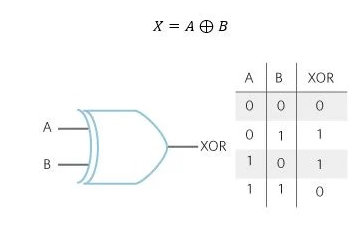

In [ ]:
# 데이터 자체가 단일 선형 프로세스에 의해 좌우되지 않는 경우라면 단순한 선형 분류자로 데이터를 분류해낼 수 없습니다.
# 이런 경우 해결 방법은 간단합니다. 여러 개의 선형 분류자를 이용해 데이터를 분류하면 되는 것입니다.